In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, beta, gamma
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [8]:
cov = np.array([[1,.4,.2],[.4,1,-.8],[.2,-.8,1]])
mean = np.array([0,0,0])
n = 2000
x = np.random.multivariate_normal(mean,cov,n)
z = norm.cdf(x, loc=0, scale =1)

In [9]:
w1 = beta.ppf(z[:,0], 1,1)
w2 = gamma.ppf(z[:,1], 2, 1)
w3 = beta.ppf(z[:,2], 2, 1)
w = np.array([w1, w2, w3]).T

In [2]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = spearmanr(x, y)[0]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

In [3]:
def plot(x):
    # Create the default pairplot
    grid = sns.pairplot(
        pd.DataFrame(x), height=3
    )

    # Map a scatter plot and Pearson correlation coefficient to the upper triangle
    grid = grid.map_upper(plt.scatter)
    grid = grid.map_upper(corr)

    # Map a histogram to the diagonal
    # grid = grid.map_diag(plt.hist)

    # Map a density plot and regression line to the lower triangle
    grid = grid.map_lower(sns.kdeplot)
    grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

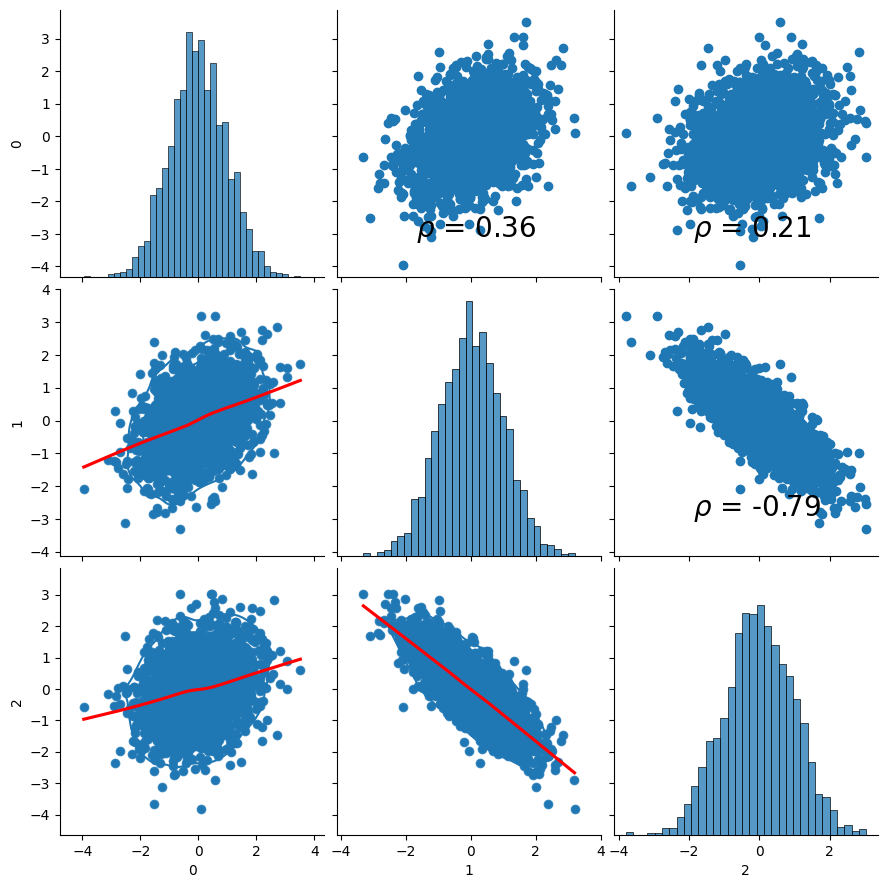

In [13]:
plot(x)

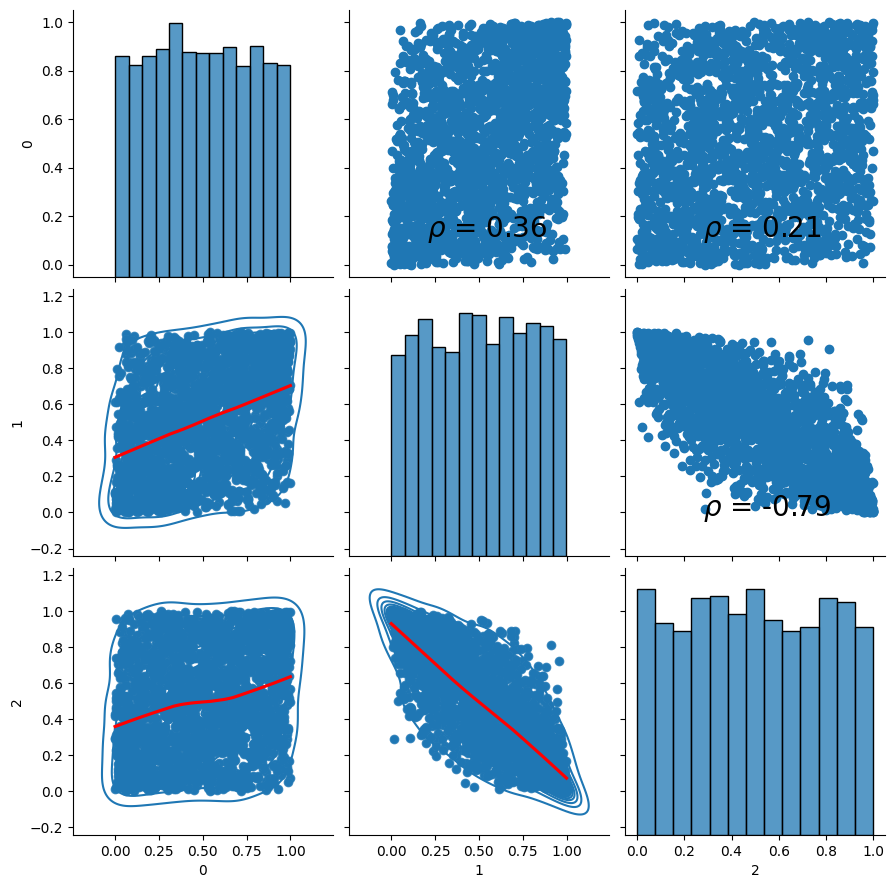

In [14]:
plot(z)

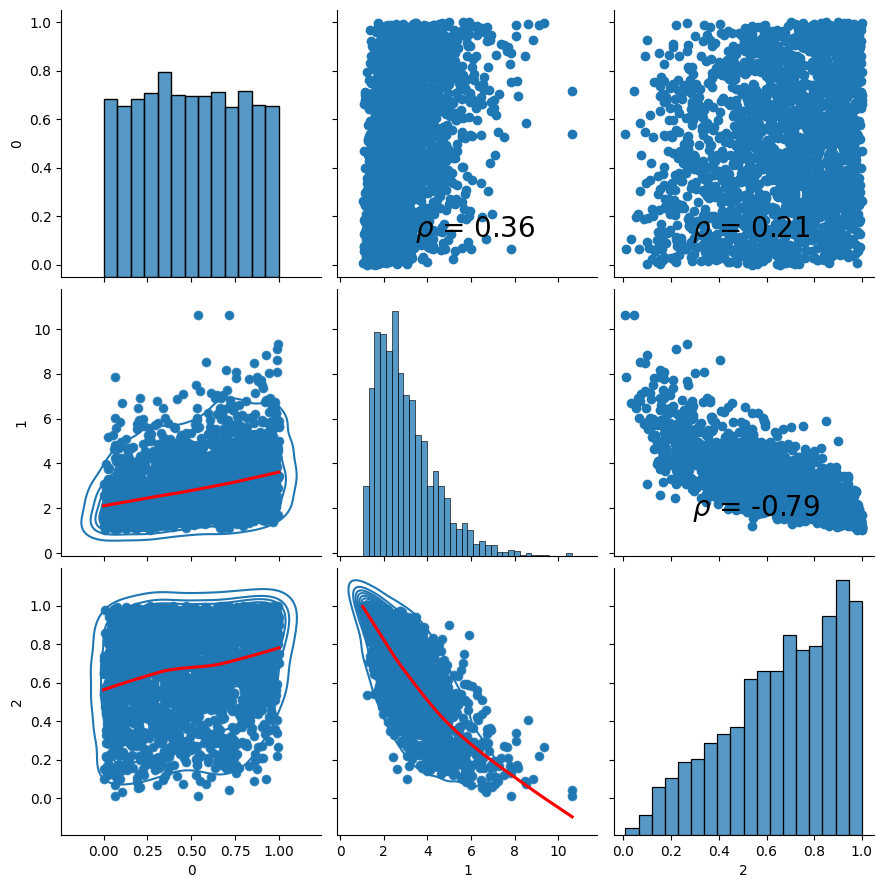

In [15]:
plot(w)

In [ ]:
# Simulation de la copule de clayton de paramètre 3
theta = 3
u1 = np.random.uniform(0,1, size = 1000)
v = np.random.uniform(0,1, size = 1000)

u2 = (( v**(-theta/(1+theta)) - 1) * u1**(-theta) + 1 )**(-1/theta)

In [15]:
u = np.array([u1, u2]).T

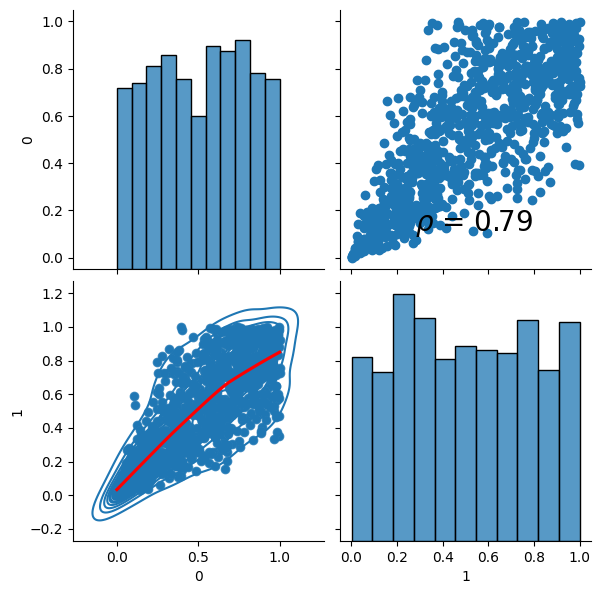

In [16]:
plot(u)

In [7]:
#%pip install copulas

In [8]:
from copulas.bivariate import Clayton
# Définir un paramètre de copule (theta)
theta = 3
copula = Clayton(theta)

# Générer des échantillons (n=1000)
samples = copula.sample(100)

print(samples[:5])

TypeError: '>' not supported between instances of 'NoneType' and 'int'